# Importing libraries

In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

# Importing data

In [125]:
path = r'C:\Users\thoma\OneDrive\Dokumente\data analytics\ML_Ach1\ClimateWins'

In [126]:
path

'C:\\Users\\thoma\\OneDrive\\Dokumente\\data analytics\\ML_Ach1\\ClimateWins'

In [127]:
Weather2 = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Weather_NOTclean.csv'))
Pleasant_weather = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'Pleasant_weather.pkl'))

In [128]:
Weather2.shape

(22950, 151)

In [129]:
# Dropping 'Unnamed: 0' column
Weather2 = Weather2.drop(['Unnamed: 0'], axis=1)

In [130]:
Weather2.shape

(22950, 150)

In [131]:
Pleasant_weather.shape

(22950, 15)

# Subsetting for single stations
# Basel weather station

In [132]:
Weather2.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_humidity', 'VALENTIA_pressure', 'VALENTIA_global_radiation',
       'VALENTIA_precipitation', 'VALENTIA_snow_depth', 'VALENTIA_sunshine',
       'VALENTIA_temp_mean', 'VALENTIA_temp_min', 'VALENTIA_temp_max', 'YEAR'],
      dtype='object', length=150)

In [133]:
# Basel weather station
def subset_station(Weather2, station):
    station = station.lower()
    station_cols = [c for c in Weather2.columns if station in str(c).lower()]
    return Weather2[['DATE'] + station_cols].copy()

In [134]:
Basel_Weather2 = subset_station(Weather2, 'Basel')

In [135]:
Basel_Weather2.columns

Index(['DATE', 'BASEL_cloud_cover', 'BASEL_wind_speed', 'BASEL_humidity',
       'BASEL_pressure', 'BASEL_global_radiation', 'BASEL_precipitation',
       'BASEL_snow_depth', 'BASEL_sunshine', 'BASEL_temp_mean',
       'BASEL_temp_min', 'BASEL_temp_max'],
      dtype='object')

In [136]:
# Dropping the 'DATE' column
Basel_Weather2 = Basel_Weather2.drop(columns=['DATE'], errors='ignore')

In [137]:
# Creating a NumPy array for X
X = Basel_Weather2.to_numpy()
X.shape

(22950, 11)

In [138]:
# Creating a NumPy array for y
y = Pleasant_weather.to_numpy()
y.shape

(22950, 15)

# Subsetting the label data set

In [139]:
# Creating a NumPy array for y
y = Pleasant_weather['BASEL_pleasant_weather'].to_numpy().squeeze()
y.shape

(22950,)

In [140]:
# Splitting the data, while preserving the temporal aspect/dependancy by 'not shuffling'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [141]:
# Creating a RF classifier & training the model on the training dataset
clf = RandomForestClassifier(n_estimators = 100, max_depth=5)  
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [142]:
# Performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Using the metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9989106753812637


In [143]:
class_names = clf.classes_.astype(str)

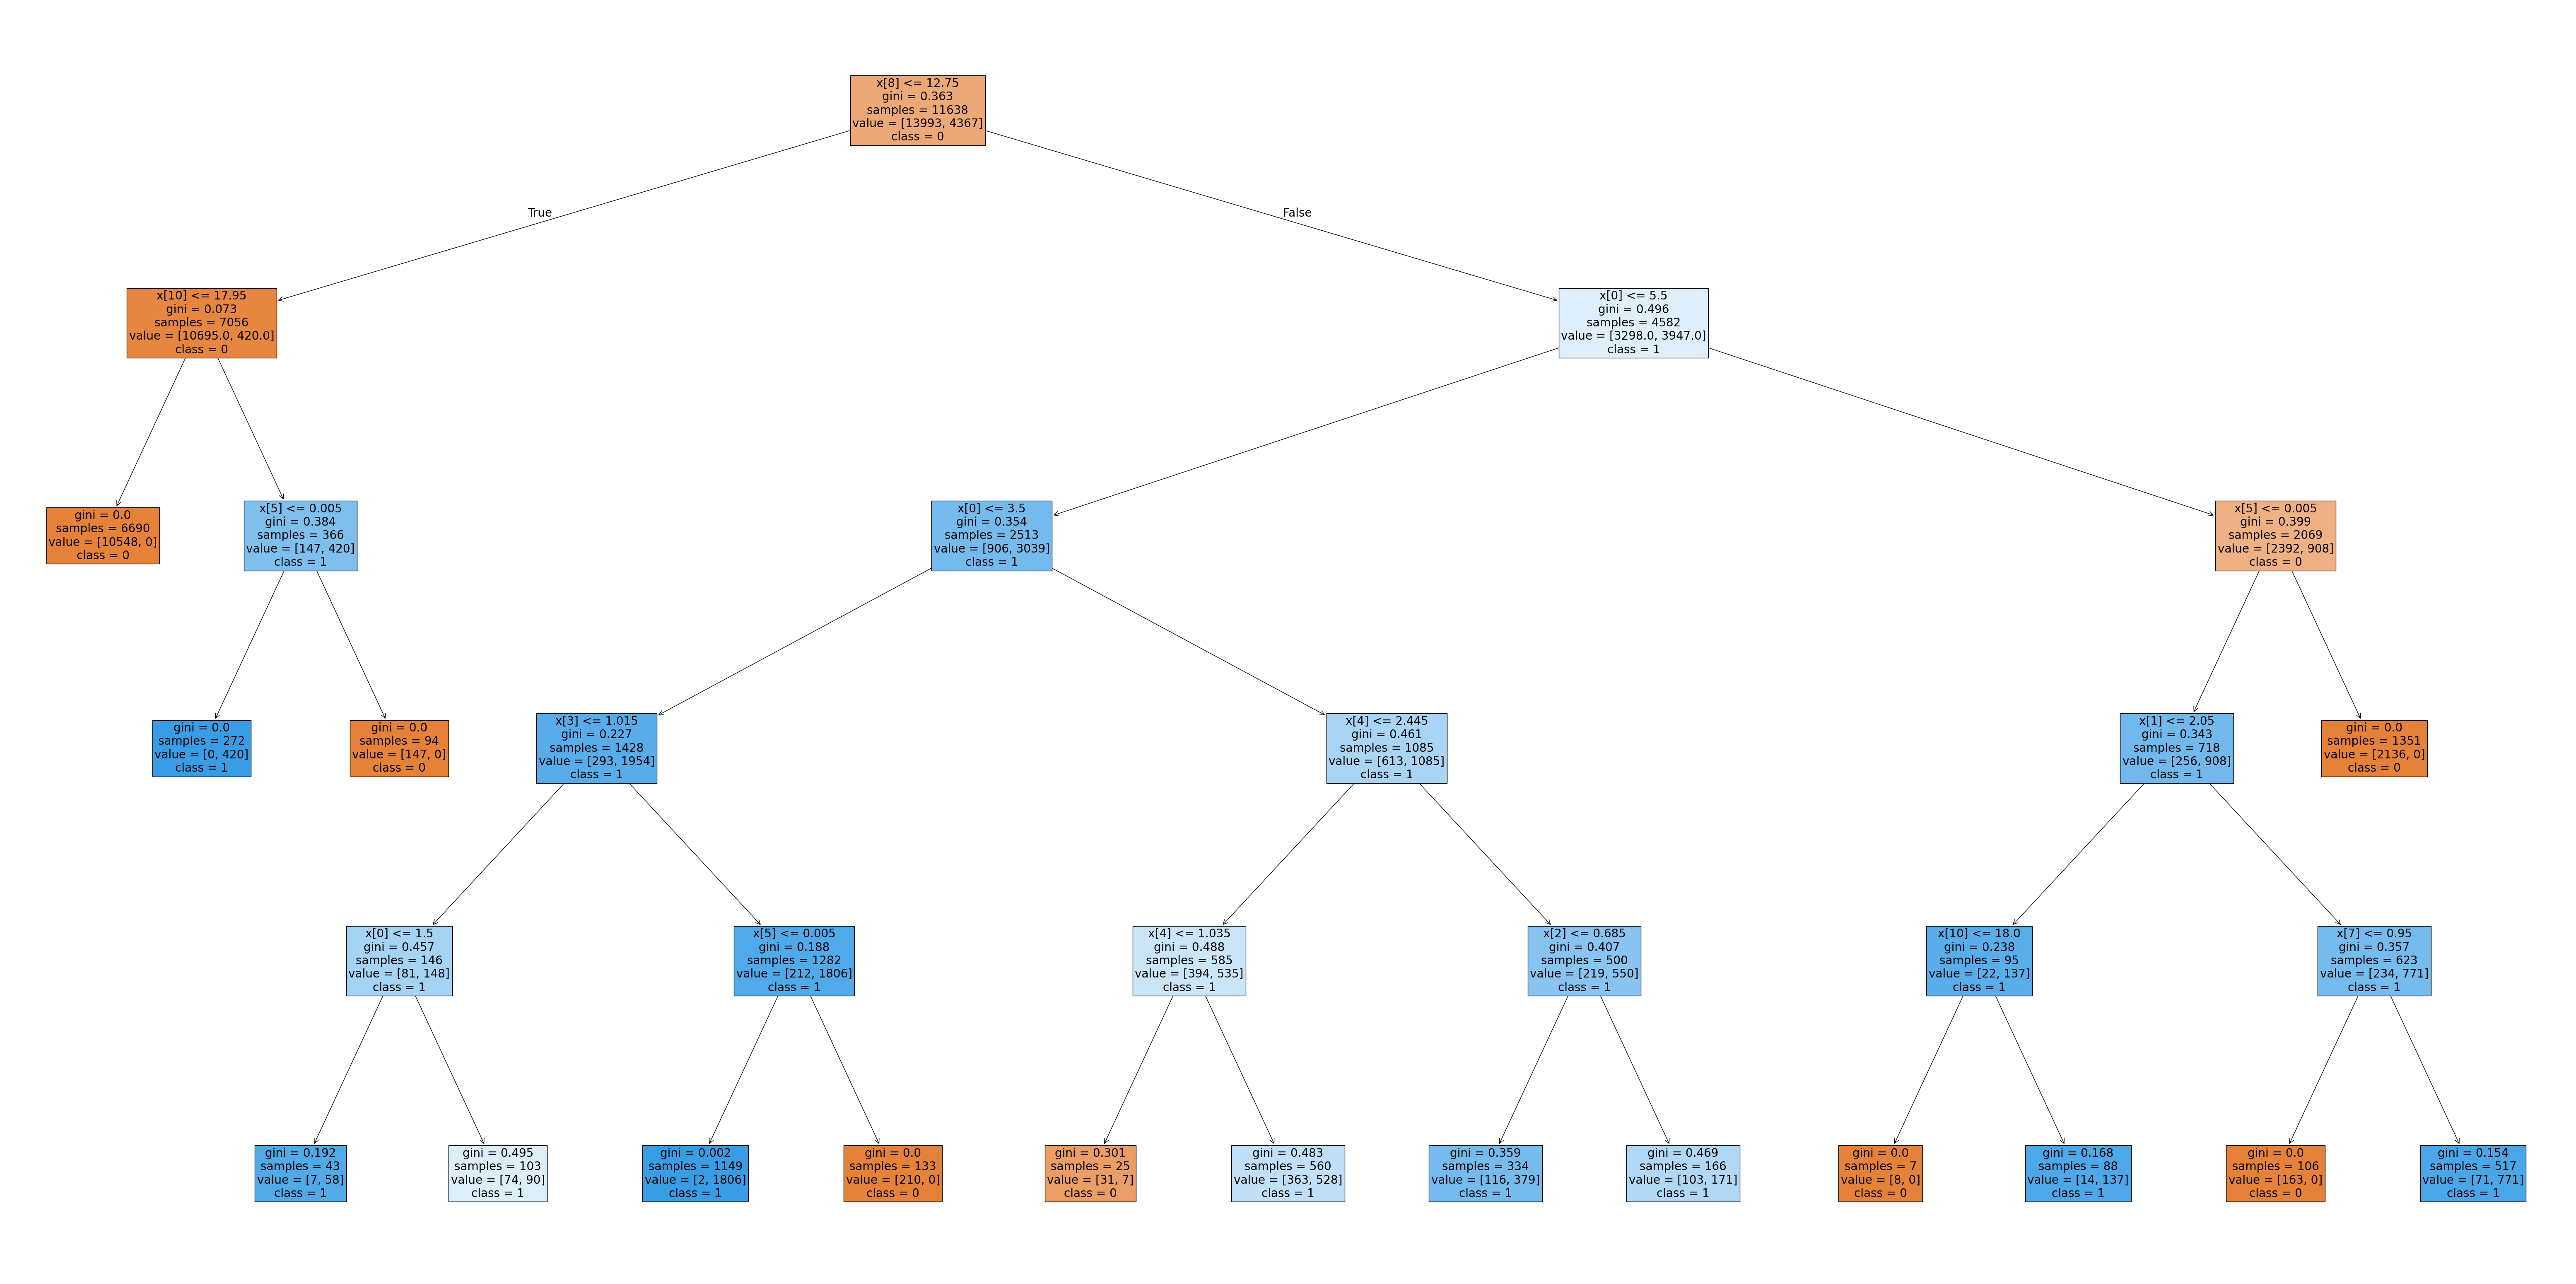

In [144]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[23], fontsize = 20, class_names=class_names, filled=True);

# Feature importance

In [145]:
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([3.32829929e-02, 1.33492513e-04, 1.20129780e-02, 6.43617466e-03,
       1.60011814e-01, 2.91782732e-01, 8.81304467e-05, 8.64560052e-02,
       1.12077383e-01, 3.86014884e-02, 2.59116808e-01])

<Axes: >

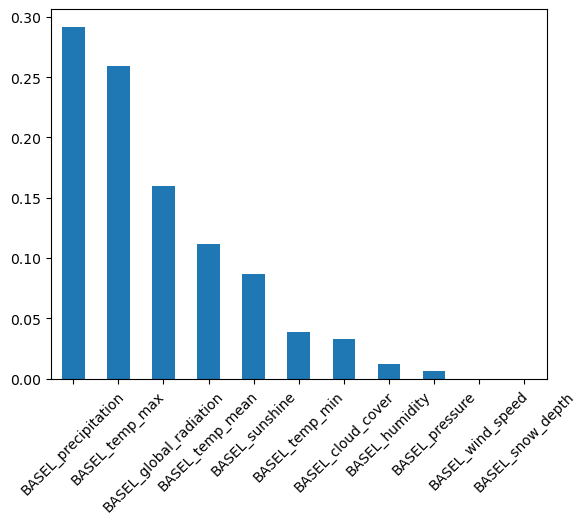

In [146]:
labels = Basel_Weather2.columns
important = pd.Series(newarray, index=labels).sort_values(ascending=False)
important.plot(kind='bar', rot=45)

# Belgrade weather station

In [147]:
Belgrade_Weather2 = subset_station(Weather2, 'Belgrade')

In [148]:
Belgrade_Weather2.columns

Index(['DATE', 'BELGRADE_cloud_cover', 'BELGRADE_humidity',
       'BELGRADE_pressure', 'BELGRADE_global_radiation',
       'BELGRADE_precipitation', 'BELGRADE_sunshine', 'BELGRADE_temp_mean',
       'BELGRADE_temp_min', 'BELGRADE_temp_max'],
      dtype='object')

In [149]:
# Dropping the 'DATE' column
Belgrade_Weather2 = Belgrade_Weather2.drop(columns=['DATE'], errors='ignore')

In [150]:
# Creating a NumPy array for X
X = Belgrade_Weather2.to_numpy()
X.shape

(22950, 9)

# Subsetting the label data set

In [151]:
# Creating a NumPy array for y
y = Pleasant_weather.to_numpy()
y.shape

(22950, 15)

In [152]:
# Creating a NumPy array for y
y = Pleasant_weather['BELGRADE_pleasant_weather'].to_numpy().squeeze()
y.shape

(22950,)

In [153]:
# Splitting the data, while preserving the temporal aspect/dependancy by 'not shuffling'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [154]:
# Creating a RF classifier & training the model on the training dataset
clf = RandomForestClassifier(n_estimators = 100, max_depth=5)  
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [155]:
# Performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Using the metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9986928104575163


In [156]:
class_names = clf.classes_.astype(str)

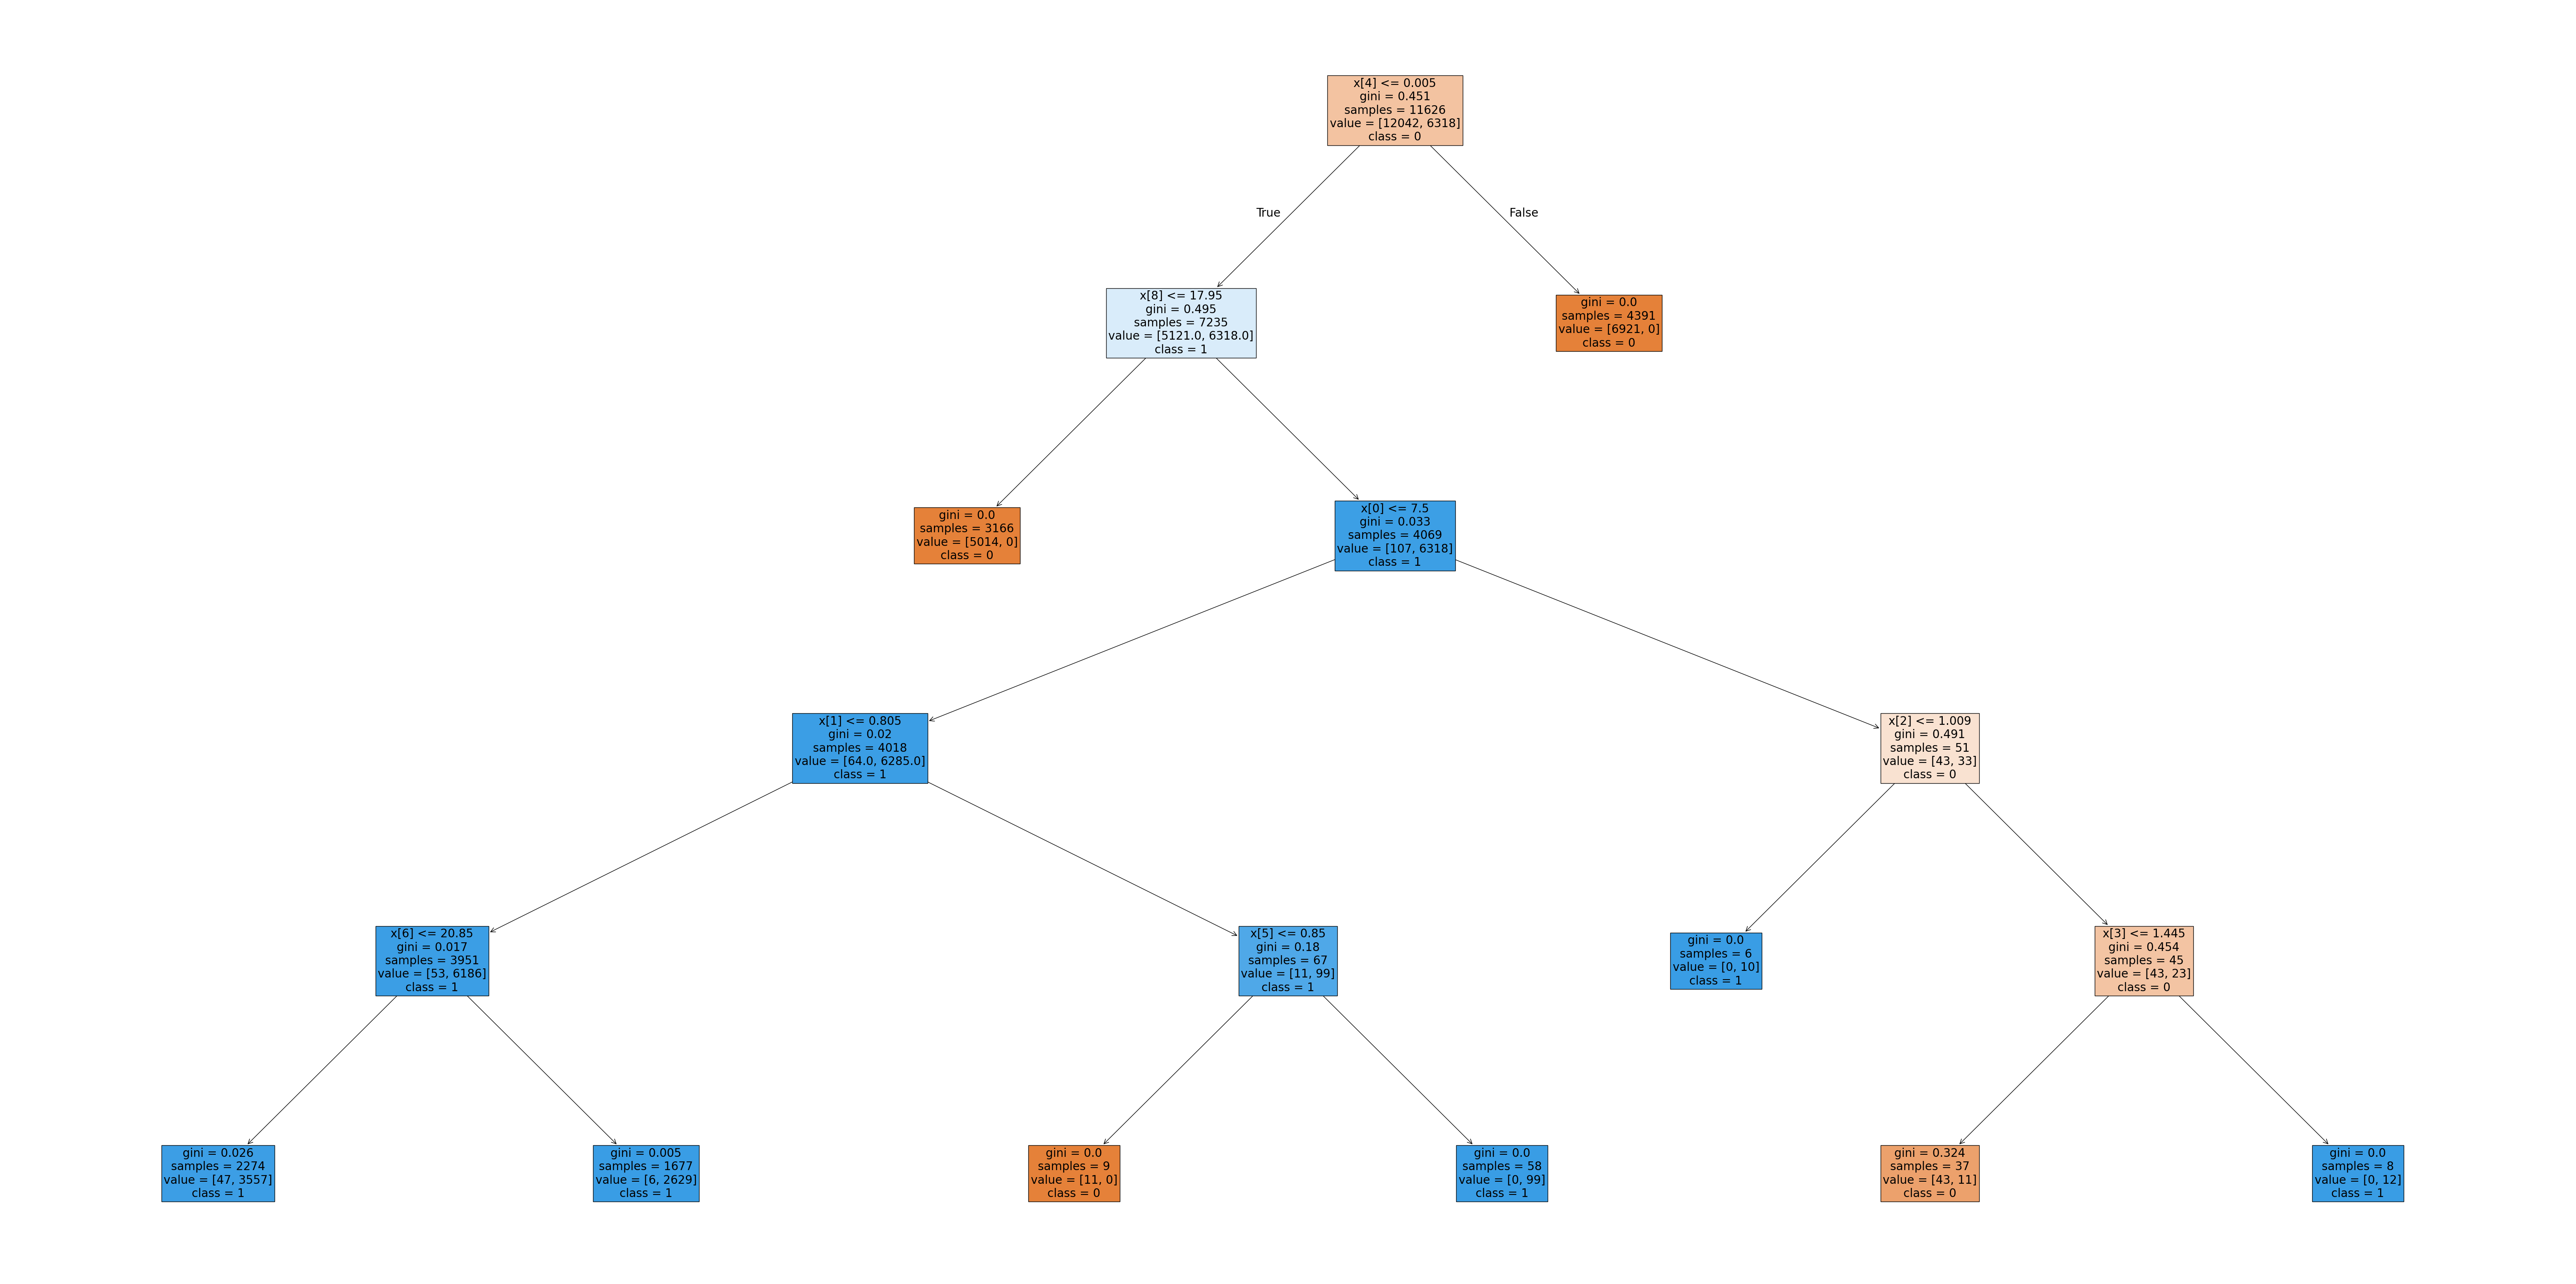

In [157]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[23], fontsize = 20, class_names=class_names, filled=True);

# Feature importance

In [158]:
newarray = clf.feature_importances_
#print(clf.feature_importances_.shape)
newarray

array([0.05337291, 0.01412628, 0.00796904, 0.0478959 , 0.31863327,
       0.08532489, 0.14700909, 0.01758451, 0.3080841 ])

<Axes: >

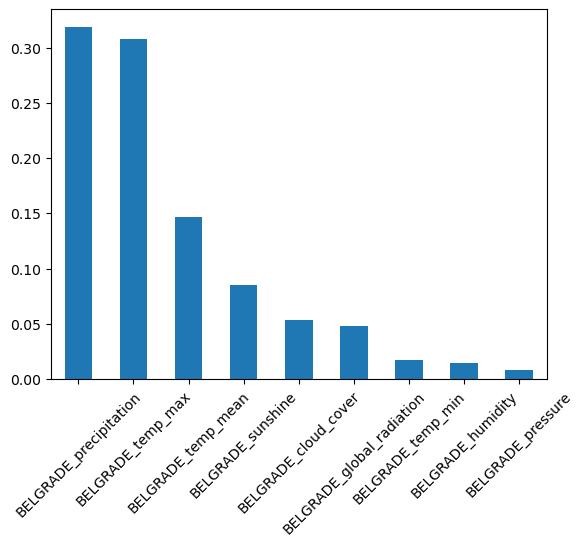

In [159]:
labels = Belgrade_Weather2.columns
important = pd.Series(newarray, index=labels).sort_values(ascending=False)
important.plot(kind='bar', rot=45)

# Madrid weather station

In [160]:
Madrid_Weather2 = subset_station(Weather2, 'Madrid')

In [161]:
Madrid_Weather2.columns

Index(['DATE', 'MADRID_cloud_cover', 'MADRID_wind_speed', 'MADRID_humidity',
       'MADRID_pressure', 'MADRID_global_radiation', 'MADRID_precipitation',
       'MADRID_sunshine', 'MADRID_temp_mean', 'MADRID_temp_min',
       'MADRID_temp_max'],
      dtype='object')

In [163]:
# Dropping the 'DATE' column
Madrid_Weather2 = Madrid_Weather2.drop(columns=['DATE'], errors='ignore')

In [164]:
# Creating a NumPy array for X
X = Madrid_Weather2.to_numpy()
X.shape

(22950, 10)

# Subsetting the label data set

In [165]:
# Creating a NumPy array for y
y = Pleasant_weather.to_numpy()
y.shape

(22950, 15)

In [166]:
# Creating a NumPy array for y
y = Pleasant_weather['MADRID_pleasant_weather'].to_numpy().squeeze()
y.shape

(22950,)

In [167]:
# Splitting the data, while preserving the temporal aspect/dependancy by 'not shuffling'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [168]:
# Creating a RF classifier & training the model on the training dataset
clf = RandomForestClassifier(n_estimators = 100, max_depth=5)  
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [169]:
# Performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Using the metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  0.9991285403050109


In [170]:
class_names = clf.classes_.astype(str)

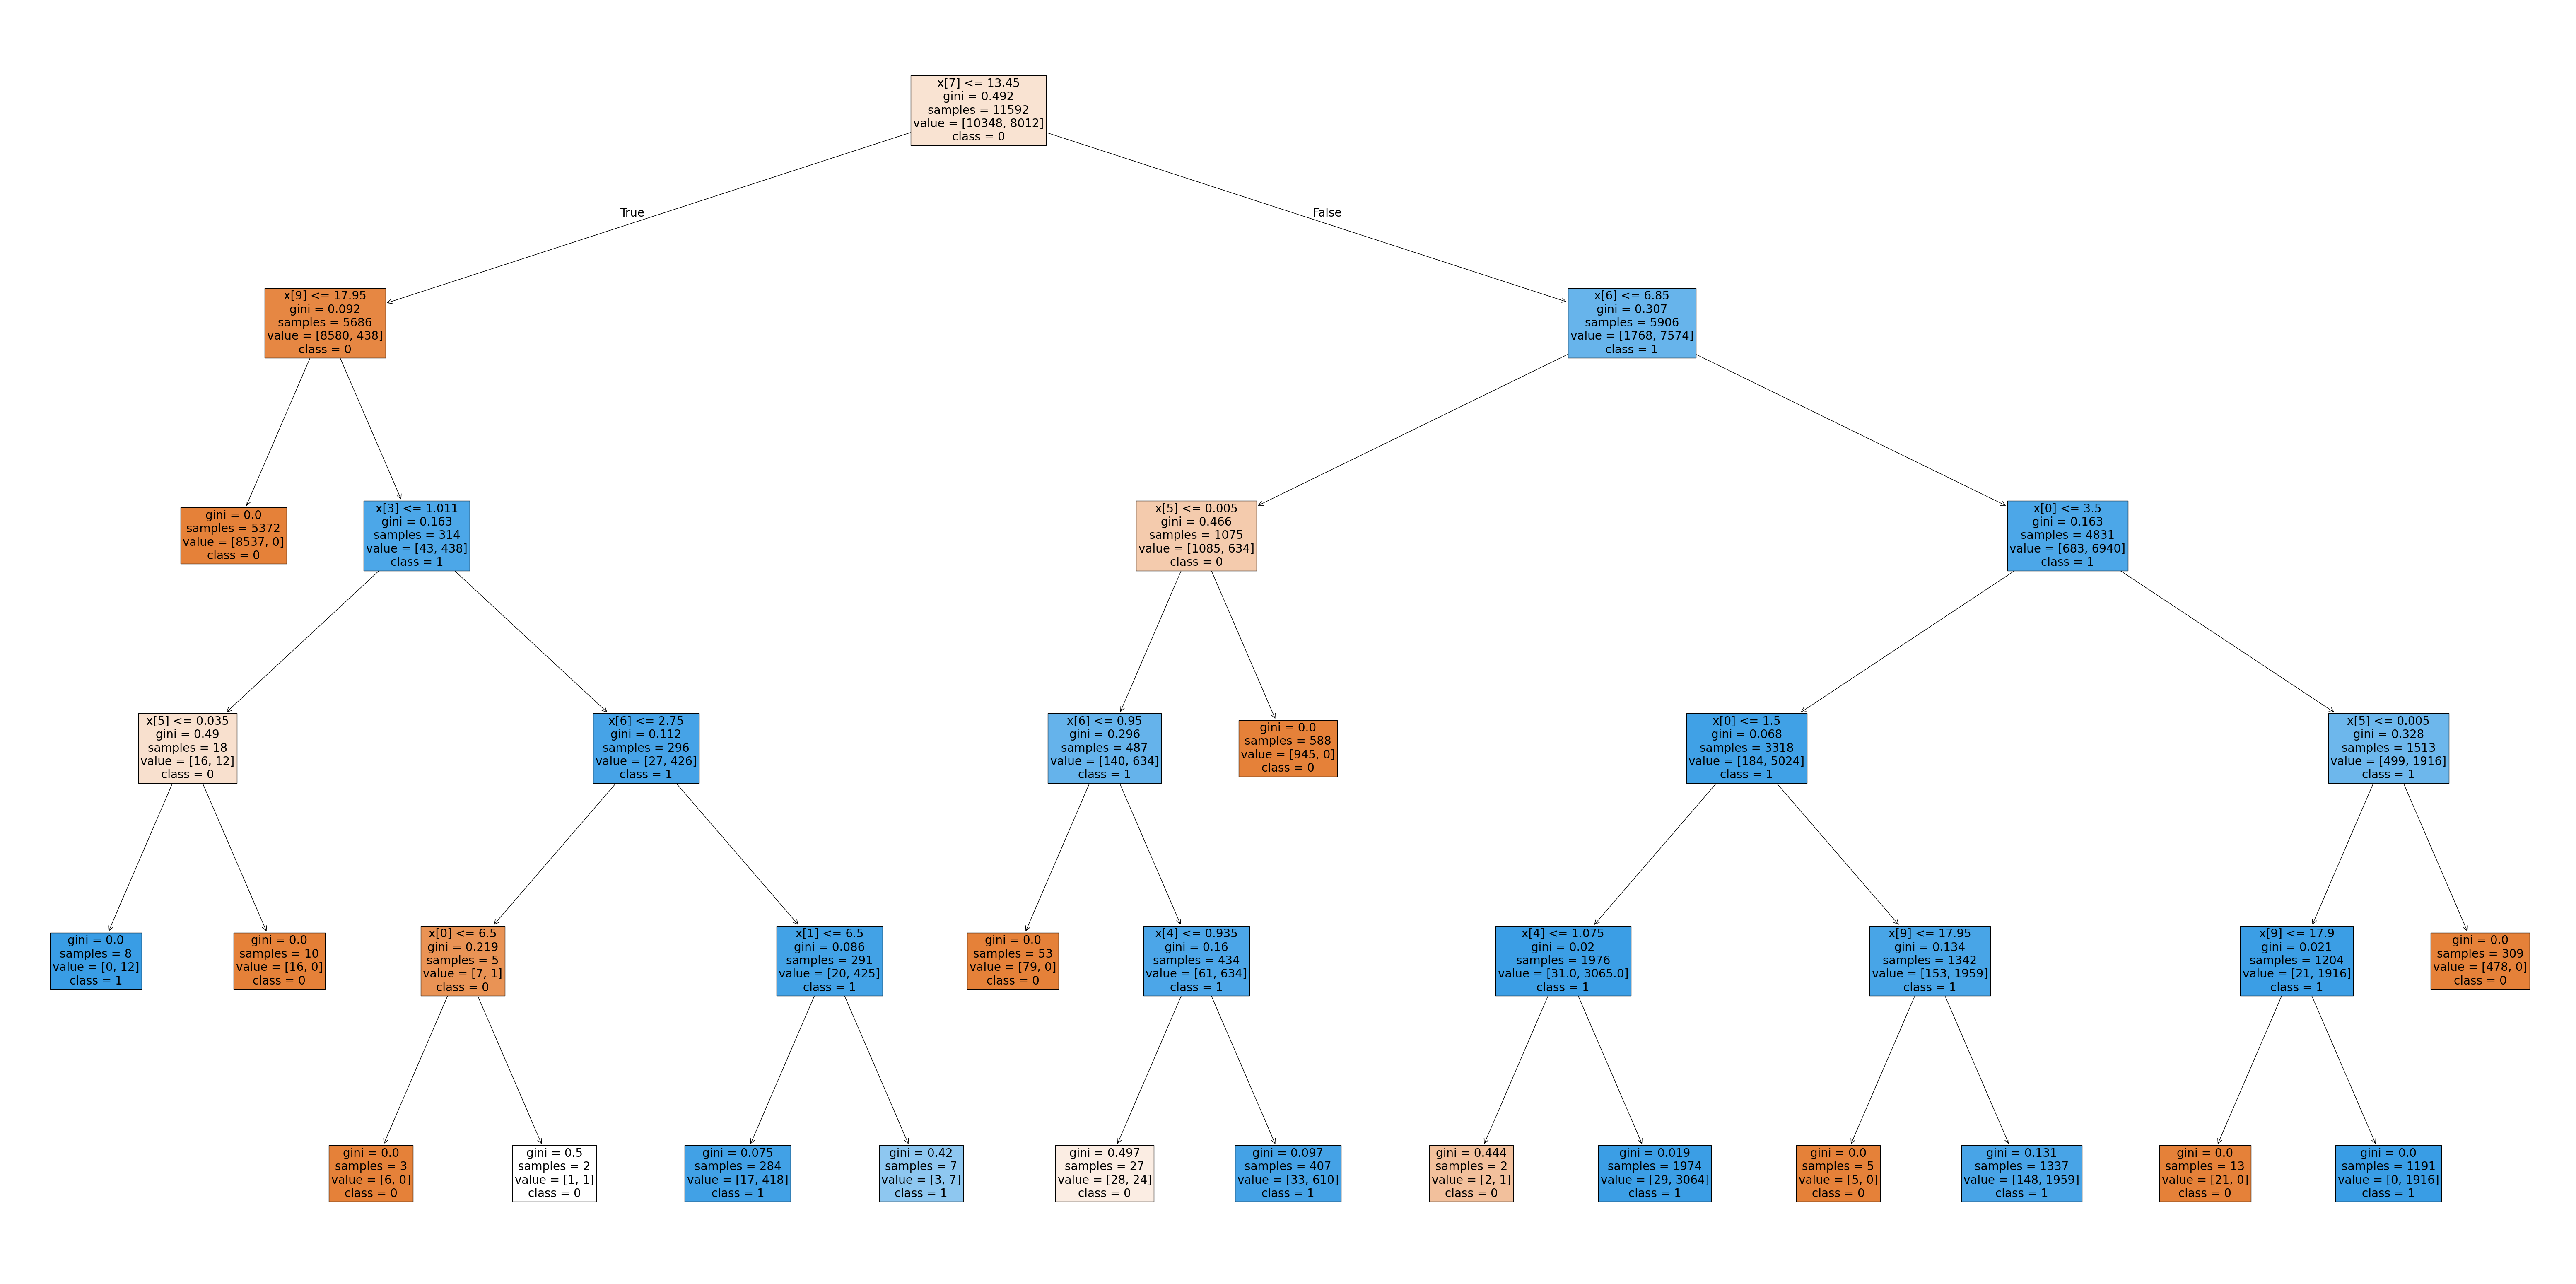

In [171]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[23], fontsize = 20, class_names=class_names, filled=True);

# Feature importance

In [172]:
newarray = clf.feature_importances_
newarray

array([1.50926604e-02, 2.74798946e-04, 2.31509110e-02, 2.41181415e-03,
       1.05310174e-01, 1.80548458e-01, 8.25785239e-02, 1.85188193e-01,
       7.70498969e-02, 3.28394569e-01])

<Axes: >

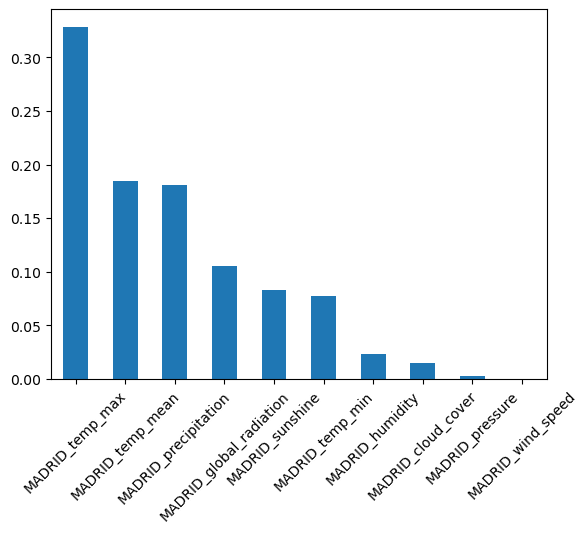

In [173]:
labels = Madrid_Weather2.columns
important = pd.Series(newarray, index=labels).sort_values(ascending=False)
important.plot(kind='bar', rot=45)